Populating the interactive namespace from numpy and matplotlib
(100, 50, 1) (100, 1)


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['add']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Epoch:  1 , Loss:  [[113322.75767042]] , Val Loss:  [[56659.50291993]]
Epoch:  2 , Loss:  [[70720.69264715]] , Val Loss:  [[35358.85618236]]
Epoch:  3 , Loss:  [[38118.62762381]] , Val Loss:  [[19058.20944475]]
Epoch:  4 , Loss:  [[15516.56208511]] , Val Loss:  [[7757.56244912]]
Epoch:  5 , Loss:  [[2914.29716507]] , Val Loss:  [[1456.81494787]]
Epoch:  6 , Loss:  [[30.35418302]] , Val Loss:  [[15.13247893]]
Epoch:  7 , Loss:  [[32.3997603]] , Val Loss:  [[16.14420017]]
Epoch:  8 , Loss:  [[32.93980427]] , Val Loss:  [[16.41169424]]
Epoch:  9 , Loss:  [[33.13157035]] , Val Loss:  [[16.50662317]]
Epoch:  10 , Loss:  [[32.99933275]] , Val Loss:  [[16.43993062]]
Epoch:  11 , Loss:  [[33.42328232]] , Val Loss:  [[16.64870834]]
Epoch:  12 , Loss:  [[33.60314403]] , Val Loss:  [[16.73837735]]
Epoch:  13 , Loss:  [[33.18343981]] , Val Loss:  [[16.53412595]]
Epoch:  14 , Loss:  [[32.74615688]] , Val Loss:  [[16.31743612]]
Epoch:  15 , Loss:  [[33.11653992]] , Val Loss:  [[16.50215855]]
Epoch: 

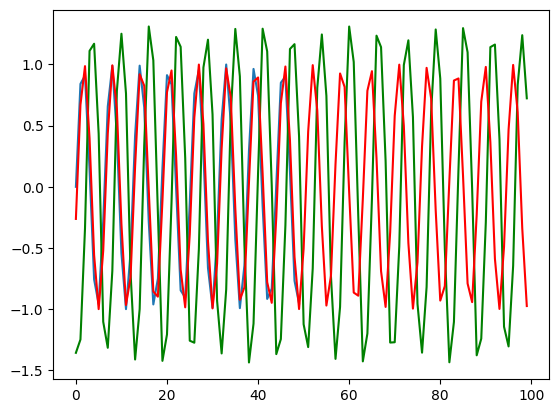

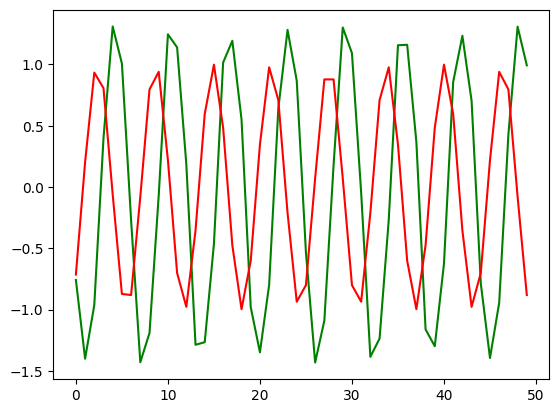

In [ ]:
%pylab inline

import math
import numpy as np
import math
import matplotlib.pyplot as plt

sin_wave = np.array([math.sin(x) for x in np.arange(200)])#generating sine wave
#INPUT AND OUTPUT
X = []
Y = []
seq_len = 50
num_records = len(sin_wave) - seq_len
for i in range(num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])
X = np.array(X)
X = np.expand_dims(X, axis=2)
Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)
print(X.shape,Y.shape)
plt.plot(sin_wave[:50])

#VALIDATION DATAS
X_val = []
Y_val = []
for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)
Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)

#RNN HYPERPARAMETERS
learning_rate = 0.0001  #learning rate of optimizer
nepoch = 20    #no of epochs
T = 50                   # length of sequence
hidden_dim = 100 #hidden layer
output_dim = 1 #output layer

bptt_truncate = 5 #limits the backpropogation
min_clip_value = -10#used for gradient clipping
max_clip_value = 10
U = np.random.uniform(0, 1, (hidden_dim, T))#between input and hidden layer
W = np.random.uniform(0, 1, (hidden_dim, hidden_dim))#btw hidden layer and hidden layer
V = np.random.uniform(0, 1, (output_dim, hidden_dim))#btw hidden and output layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))#sigmoid activation function

  #TRAINING THE MODEL
for epoch in range(nepoch):
    # check loss on train
    loss = 0.0

    # do a forward pass to get prediction
    for i in range(Y.shape[0]):
        x, y = X[i], Y[i]                    # get input, output values of each record
        prev_s = np.zeros((hidden_dim, 1))   # here, prev-s is the value of the previous activation of hidden layer; which is initialized as all zeroes
        for t in range(T):
            new_input = np.zeros(x.shape)    # we then do a forward pass for every timestep in the sequence
            new_input[t] = x[t]              # for this, we define a single input for that timestep
            mulu = np.dot(U, new_input)      #output prediction
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s

    # calculate error
        loss_per_record = (y - mulv)**2 / 2
        loss += loss_per_record
    loss = loss / float(y.shape[0])
    val_loss = 0.0
    for i in range(Y_val.shape[0]):
        x, y = X_val[i], Y_val[i]
        prev_s = np.zeros((hidden_dim, 1))
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s

        loss_per_record = (y - mulv)**2 / 2
        val_loss += loss_per_record
    val_loss = val_loss / float(y.shape[0])

    print('Epoch: ', epoch + 1, ', Loss: ', loss, ', Val Loss: ', val_loss)
    for i in range(Y.shape[0]):
        x, y = X[i], Y[i]

        layers = []
        prev_s = np.zeros((hidden_dim, 1))
        dU = np.zeros(U.shape)
        dV = np.zeros(V.shape)
        dW = np.zeros(W.shape)

        dU_t = np.zeros(U.shape)
        dV_t = np.zeros(V.shape)
        dW_t = np.zeros(W.shape)

        dU_i = np.zeros(U.shape)
        dW_i = np.zeros(W.shape)

        # forward pass
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            layers.append({'s':s, 'prev_s':prev_s})
            prev_s = s
        # derivative of pred
        dmulv = (mulv - y)

        # backward pass
        for t in range(T):
            dV_t = np.dot(dmulv, np.transpose(layers[t]['s']))
            dsv = np.dot(np.transpose(V), dmulv)

            ds = dsv
            dadd = add * (1 - add) * ds

            dmulw = dadd * np.ones_like(mulw)

            dprev_s = np.dot(np.transpose(W), dmulw)
            for i in range(t-1, max(-1, t-bptt_truncate-1), -1):
                ds = dsv + dprev_s
                dadd = add * (1 - add) * ds

                dmulw = dadd * np.ones_like(mulw)
                dmulu = dadd * np.ones_like(mulu)

                dW_i = np.dot(W, layers[t]['prev_s'])
                dprev_s = np.dot(np.transpose(W), dmulw)

                new_input = np.zeros(x.shape)
                new_input[t] = x[t]
                dU_i = np.dot(U, new_input)
                dx = np.dot(np.transpose(U), dmulu)

                dU_t += dU_i
                dW_t += dW_i

            dV += dV_t
            dU += dU_t
            dW += dW_t
            if dU.max() > max_clip_value:
                dU[dU > max_clip_value] = max_clip_value
            if dV.max() > max_clip_value:
                dV[dV > max_clip_value] = max_clip_value
            if dW.max() > max_clip_value:
                dW[dW > max_clip_value] = max_clip_value


            if dU.min() < min_clip_value:
                dU[dU < min_clip_value] = min_clip_value
            if dV.min() < min_clip_value:
                dV[dV < min_clip_value] = min_clip_value
            if dW.min() < min_clip_value:
                dW[dW < min_clip_value] = min_clip_value

        # update
        U -= learning_rate * dU
        V -= learning_rate * dV
        W -= learning_rate * dW
preds = []
for i in range(Y.shape[0]):
    x, y = X[i], Y[i]
    prev_s = np.zeros((hidden_dim, 1))
    # Forward pass
    for t in range(T):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s

    preds.append(mulv)

preds = np.array(preds)
plt.plot(preds[:, 0, 0], 'g')
plt.plot(Y[:, 0], 'r')
plt.show()

preds = []
for i in range(Y_val.shape[0]):
    x, y = X_val[i], Y_val[i]
    prev_s = np.zeros((hidden_dim, 1))
    # For each time step...
    for t in range(T):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s

    preds.append(mulv)

preds = np.array(preds)

plt.plot(preds[:, 0, 0], 'g')
plt.plot(Y_val[:, 0], 'r')
plt.show()



